In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

# Solve ODEs: Fixed input
Equation: dx/dt + x = 12,  x(0) = 0

In [2]:
m = GEKKO(remote=False)
m.time = np.linspace(0,5)
x = m.Var(0)
m.Equation(x.dt()+x==12)
m.options.IMODE=4
m.solve(disp=False)

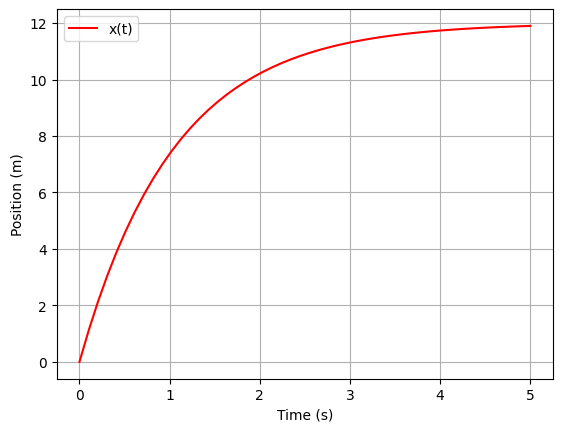

In [5]:
fig, ax = plt.subplots()
ax.plot(m.time, x.value, 'r-', label='x(t)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax.legend()
ax.grid()
plt.show()

# Solve ODEs: Parametric input
Equation: dx/dt + x = u(t),  x(0) = 0

Where u(t) is a time-varying input function.

0 <= u(t) <= 12

Cost function: Minimize (x - 5)**2 dt over the time horizon.

In [6]:
m = GEKKO(remote=False)
m.time = np.linspace(0,5)
x = m.Var(0)
u = m.MV(0, lb=0, ub=12); u.STATUS = 1
m.Equation(x.dt()+x==u)
m.Minimize((x-5)**2)
m.options.IMODE=6
m.solve(disp=False)

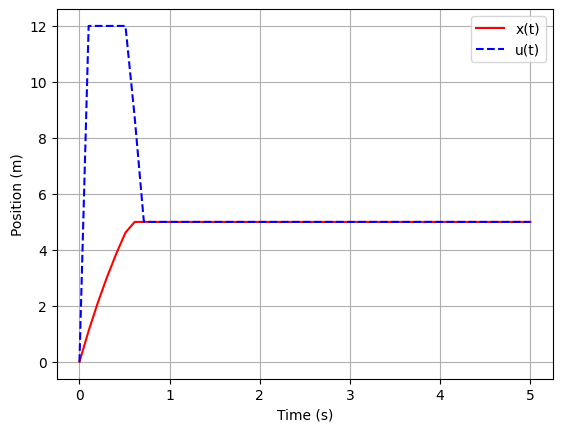

In [7]:
fig, ax = plt.subplots()
ax.plot(m.time, x.value, 'r-', label='x(t)')
ax.plot(m.time, u.value, 'b--', label='u(t)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax.legend()
ax.grid()
plt.show()

# Another example:

In [35]:
m = GEKKO(remote=False)
# input  (1) = u
# states (5) = x[1] to x[5]
# output (1) = y

# Constants
n = 5
K = m.Const(4)

# Parameter
# u = m.Param(value=3,lb=0,ub=10)
u = m.MV(0, lb=0, ub=10); u.STATUS = 1

# Variable array
x = m.Array(m.Var,5,lb=0)

# Intermediate
y = m.Intermediate(x[4])

# Equations
m.Equation( x[0].dt()  + x[0] == K*u)
m.Equations([x[i].dt() + x[i] == x[i-1]
             for i in range(1,n)])

# Objective
m.Minimize((y-5)**2)

# Define time
m.time = np.linspace(0,20)

# Solve dynamic simulation
m.options.IMODE = 6
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  1
   Variables    :  6
   Intermediates:  1
   Connections  :  0
   Equations    :  7
   Residuals    :  6
 
 Number of state variables:    735
 Number of total equations: -  686
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    49
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         F

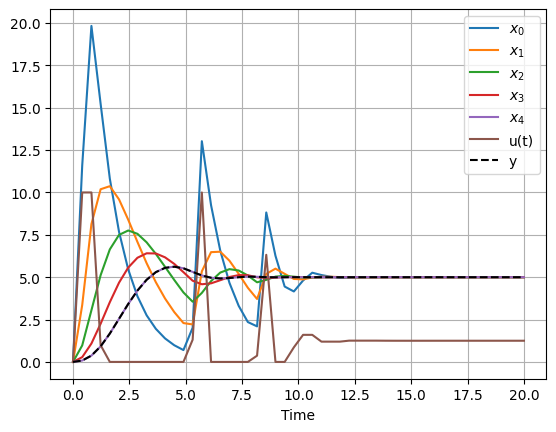

In [36]:
# Show solution
for i in range(n):
    plt.plot(m.time,x[i],label=f'$x_{i}$')
plt.plot(m.time,u,label='u(t)')
plt.plot(m.time,y,'k--',label='y')
plt.xlabel('Time'); 
plt.grid(); 
plt.legend()
plt.show()

# A simple ODE system

In [38]:
def analytical_solution(t):
    y1 = np.sin(t)
    y2 = np.cos(t)
    return y1, y2

In [67]:
m = GEKKO(remote=False)
n_points = 500
m.time = np.linspace(0,10,n_points)
y1,y2= [m.Var(value=0) for _ in range(2)]
# Initial conditions
y1.value=0
y2.value=1
m.Equation(y1.dt()==y2)
m.Equation(y2.dt()==-y1)
m.options.IMODE=4
m.solve(disp=False)

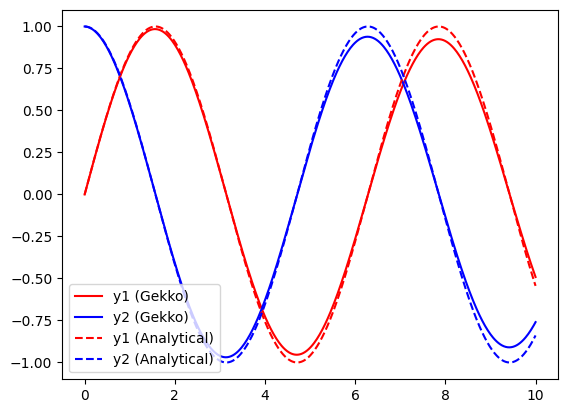

In [68]:
fig, ax = plt.subplots()
ax.plot(m.time, y1.value, 'r-', label='y1 (Gekko)')
ax.plot(m.time, y2.value, 'b-', label='y2 (Gekko)')
analytical_time = np.linspace(0,10,1_000)
ax.plot(analytical_time, analytical_solution(analytical_time)[0], 'r--', label='y1 (Analytical)')
ax.plot(analytical_time, analytical_solution(analytical_time)[1], 'b--', label='y2 (Analytical)')
ax.legend()
plt.show()